<a href="https://colab.research.google.com/github/Noobs-in-Devhack/AI---ML-/blob/main/7%20-%20KNN_Shoppers_Intention_Classification_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Step 1. Import Libraries and Read DataSets

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
shoppers_df = pd.read_csv("https://raw.githubusercontent.com/ammishra08/MachineLearning/master/Datasets/Online%20Shoppers%20Intention.csv")
shoppers_df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


Data Description
  * Administrative - This is number of pages of this type(administrative) that user visited.
  * Administrative_Duration - Duration spent in this category of pages.
  * Informational - Number of pages of this type (informational) that the user visited
  * Informational_Duration - Duration spent in this category of pages.
  * ProductRelated - Number of pages of this type (product related) that the user visited
  * ProductRelated_Duration    - Duration spent in this category of pages
  * BounceRates - Percentage of visitors who enter the website through that page and exit without triggering any additional tasks
  * ExitRates - percentage of pageviews on the website that end at that specific page
  * PageValues - Average value of the page averaged over the value of the target page and/or the completion of an eCommerce transaction
  * SpecialDay - Special days or holidays like valetine's day or mother's day etc.
  * Month    -
  * OperatingSystems -
  * Browser    -
  * Region -
  * TrafficType - Direct, Referal, Organic, Social Traffic
  * VisitorType    -
  * Weekend -
  * Revenue - Target Label

#### Step 2. Data Manipulation
  * Is there any missing values ?

In [ ]:
shoppers_df.isnull().sum()

Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64

In [ ]:
shoppers_df.dropna(inplace = True)

In [ ]:
shoppers_df.shape    # records (rows, columns)

(12316, 18)

#### Step 3. Data Pre-Processing
    * Handling Categorical dataset

In [ ]:
shoppers_df['Month'].unique()

array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'], dtype=object)

In [ ]:
shoppers_df['VisitorType'].unique()

array(['Returning_Visitor', 'New_Visitor', 'Other'], dtype=object)

In [ ]:
# Label Encoder is used in ordinal or two category , values for given column
from sklearn.preprocessing import LabelEncoder
le_encoder = LabelEncoder()
le_encoder.fit(shoppers_df['Month'])
shoppers_df['Month'] = le_encoder.transform(shoppers_df['Month'])

In [ ]:
# One HoT Encoding
visitor_df = pd.get_dummies(shoppers_df['VisitorType']).astype('int')

In [ ]:
shoppers_df1 = pd.concat([shoppers_df,visitor_df], axis = 1)
shoppers_df1.drop(['VisitorType'], axis = 1, inplace = True)

##### Is there any Multi-Collinearity ?

<Axes: >

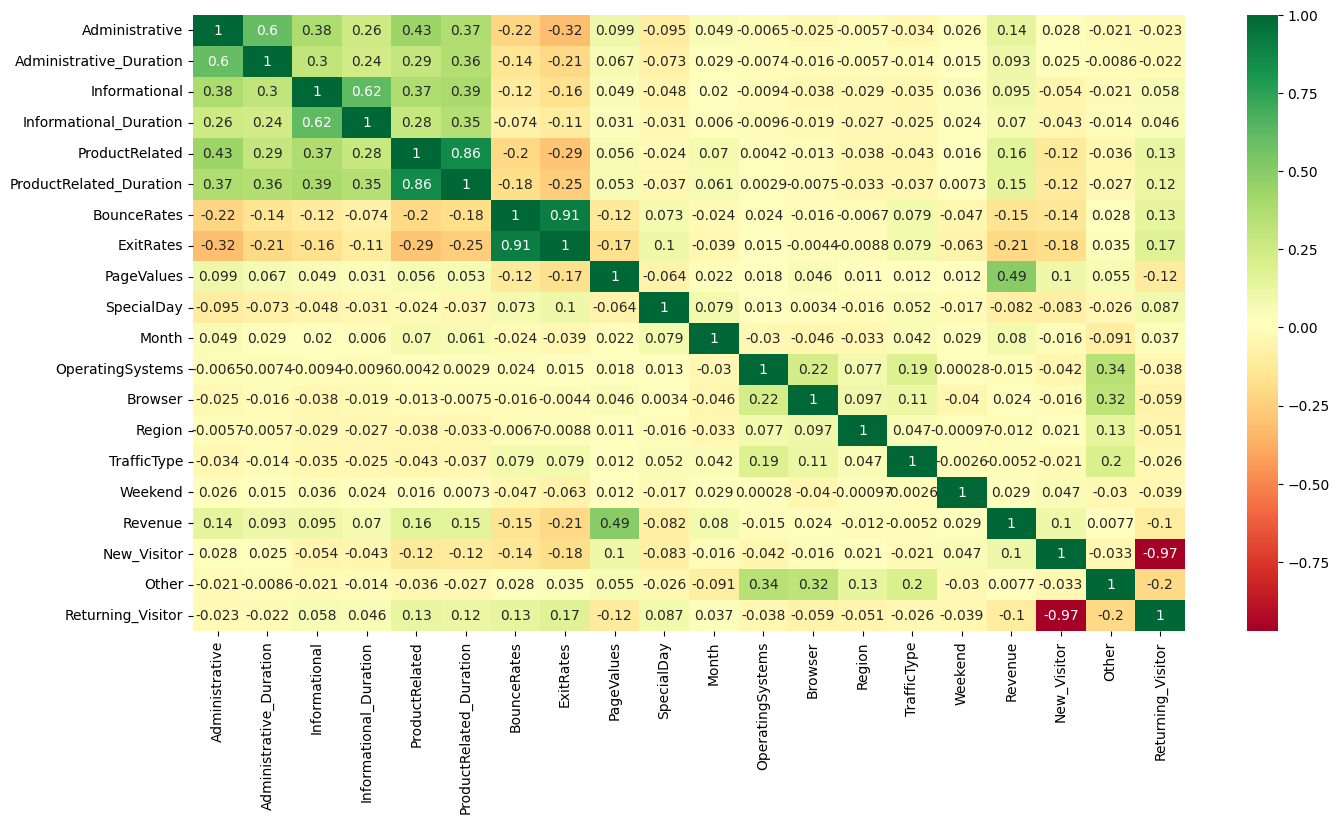

In [ ]:
plt.figure(figsize = (16,8))
sns.heatmap(shoppers_df1.corr(), annot = True, cmap = 'RdYlGn')

#### Features & Label

In [ ]:
X = shoppers_df1.drop(['ProductRelated_Duration','BounceRates','New_Visitor', 'Revenue'], axis = 1)
Y = shoppers_df1['Revenue']

##### SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
transformed_feature, transformed_label = oversample.fit_resample(X, Y)

In [ ]:
transformed_label.value_counts()

Revenue
False    10408
True     10408
Name: count, dtype: int64

##### Train & Test Split

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(transformed_feature, transformed_label, test_size = 0.2, random_state = 0)

##### K-Neatest Neighbours(KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [ ]:
knn.score(x_test, y_test)

0.9128242074927954

#### GridSearchCV()

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
from sklearn.model_selection import GridSearchCV
# GridSearchCV() - For HyperParameter Tuning
param_grid = {'n_neighbors' : np.arange(2,25)}

In [ ]:
# cv = cross-validation , k-fold validation , train-test folds, 7 folds are formed
knn_cv = GridSearchCV(knn, param_grid, cv = 7)

In [ ]:
knn_cv.fit(x_train, y_train)

GridSearchCV(cv=7, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24])})

In [ ]:
knn_cv.best_params_

{'n_neighbors': 2}

In [ ]:
knn_cv.best_score_

0.9004919946887987

#### Final Model

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 2)

In [ ]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [ ]:
knn.score(x_test, y_test)

0.9128242074927954

#### Classification Metrics

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
predict = knn.predict(x_test)

In [ ]:
confusion_matrix(y_test, predict)

array([[1845,  219],
       [ 144, 1956]])

In [ ]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

       False       0.93      0.89      0.91      2064
        True       0.90      0.93      0.92      2100

    accuracy                           0.91      4164
   macro avg       0.91      0.91      0.91      4164
weighted avg       0.91      0.91      0.91      4164

